A look into the sentiment around Apple, based on tweets containing #AAPL, @apple, etc.
Contributors were given a tweet and asked whether the user was positive, negative, or neutral about Apple. (They were also allowed to mark “the tweet is not about the company Apple, Inc.)
Tweets cover a wide array of topics including stock performance, new products, IP lawsuits, customer service at Apple stores, etc.

In [44]:
import warnings
warnings.filterwarnings('ignore')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# Import packages
import os
#os.chdir(r'/Users/harsh/Desktop/NLP Project')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import nltk

In [77]:
#Reading Data file
ats=pd.read_csv('Apple-Twitter-Sentiment.csv',encoding="ISO-8859-1")

#Make copy of the dataset
atsc=ats.copy()

# checking the content of dataset
ats.head(10).T

,0,1,2,3,4,5,6,7,8,9
_unit_id,623495513,623495514,623495515,623495516,623495517,623495518,623495519,623495520,623495521,623495522
_golden,True,True,True,True,False,True,True,True,True,False
_unit_state,golden,golden,golden,golden,finalized,golden,golden,golden,golden,finalized
_trusted_judgments,10,12,10,17,3,13,13,9,15,3
_last_judgment_at,NaN,NaN,NaN,NaN,12/12/14 12:14,NaN,NaN,NaN,NaN,12/12/14 0:52
sentiment,3,3,3,3,3,3,5,5,3,3
sentiment:confidence,0.6264,0.8129,1,0.5848,0.6474,0.5975,0.8468,0.6736,0.7997,0.636
date,Mon Dec 01 19:30:03 +0000 2014,Mon Dec 01 19:43:51 +0000 2014,Mon Dec 01 19:50:28 +0000 2014,Mon Dec 01 20:26:34 +0000 2014,Mon Dec 01 20:29:33 +0000 2014,Mon Dec 01 20:30:03 +0000 2014,Mon Dec 01 20:32:45 +0000 2014,Mon Dec 01 20:34:31 +0000 2014,Mon Dec 01 20:36:47 +0000 2014,Mon Dec 01 20:45:03 +0000 2014
id,5.4e+17,5.4e+17,5.4e+17,5.4e+17,5.4e+17,5.4e+17,5.4e+17,5.4e+17,5.4e+17,5.4e+17
query,#AAPL OR @Apple,#AAPL OR @Apple,#AAPL OR @Apple,#AAPL OR @Apple,#AAPL OR @Apple,#AAPL OR @Apple,#AAPL OR @Apple,#AAPL OR @Apple,#AAPL OR @Apple,#AAPL OR @Apple


In [109]:
#Removing unwanted columns
atsf=ats[['_unit_id','sentiment','text']]
#Renaming columns
atsf.columns=['id','sentiment_type','tweet']
atsf.head()

,id,sentiment_type,tweet
0,623495513,3,#AAPL:The 10 best Steve Jobs emails ever...htt...
1,623495514,3,RT @JPDesloges: Why AAPL Stock Had a Mini-Flas...
2,623495515,3,My cat only chews @apple cords. Such an #Apple...
3,623495516,3,I agree with @jimcramer that the #IndividualIn...
4,623495517,3,Nobody expects the Spanish Inquisition #AAPL


(3886, 3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3886 entries, 0 to 3885
Data columns (total 3 columns):
id                3886 non-null int64
sentiment_type    3886 non-null object
tweet             3886 non-null object
dtypes: int64(1), object(2)
memory usage: 91.2+ KB


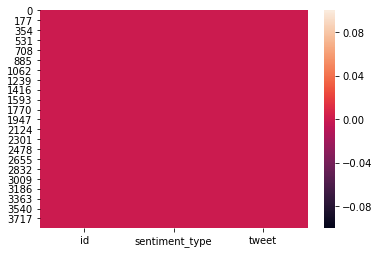

In [110]:
#Exploring Dimensions and features info
atsf.shape
atsf.info()
# Change Category of sentiment type to category
atsf.sentiment_type=atsf.sentiment_type.astype(dtype='category')
#Exploring presence of null values
sns.heatmap(atsf.isnull())

In [114]:
# Distribution of classes
atsf.sentiment_type.value_counts(normalize='True')
# recoding label
atsf.sentiment_type.replace({'not_relevant':2},inplace=True)


3    0.556356
1    0.313690
5    0.108852
2    0.021101
Name: sentiment_type, dtype: float64